# Analyzing the 2020 Stack Overflow Developer Survey - Which Characteristics Do Developers with a High Job Satisfaction Share?

This Jupyter Notebook represents the basis for a Medium post as part of the Udacity Data Scientist Nanodegree. The goal of this analysis was to analyze and identify a few of the characteristics that satisfied developers share. Answering this question, the analysis intended to explore whether individuals can influence their job satisfaction or whether these factors are mainly set and not influenceable.

To answer these questions and to provide the basis for the Medium post, this Jupyter Notebook is structured according to the following sections:
* 1 Business Understanding
* 2 Data Understanding
* 3 Data Preparation
* 4 Data Analysis and Modeling
* 5 Evaluation and Conclusion

Please note that some of the functions and code are taken from the tutorials of the Udacity Data Scientist Nanodegree. While I tried to write as much code as possible myself, I used (both by chance and by intention) some of the functions and code presented in the tutorials. 

## 1 Business Understanding
Following the analysis done as part of the first section of the Udacity Data Scientist Nanodegree, I read the Medium blog post by Josh under https://medium.com/@josh_2774/how-do-you-become-a-developer-5ef1c1c68711. While this post gave some instructions on how to become a developer, I started to wonder how satisfied individuals in this field look like and whether one could provide any guidelines regarding how to become a satisfied developer. To this end, I wanted to explore the characteristics that developers with a high job satisfaction share - it is to be seen whether there are indeed common characteristics - and, secondly, determine whether these factors can be influenced or whether they are mainly set.

After reviewing the 2020 Stack Overflow Developer Survey, I determined to answer the following questions: 
* Do developers with a higher salary demonstrate a higher job satisfaction?
* To which extent do the working hours influence job satisfaction?
* Do experienced programmers tend to be more satisfied than their less experienced colleagues?
* Can we predict the job satisfaction of developers based on their responses regarding their salary, working hours, and experience as part of the 2020 Stack Overflow Developer Survey?

The results of the 2020 Stack Overflow Developer Survey can be found under https://insights.stackoverflow.com/survey. After downloading them to my local machine, I have loaded the data into this Jupyter notebook and started with trying to understand the data. This next step is described below.


## 2 Data Understanding

In [1]:
# Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv') # Load data frame containing survey responses
schema = pd.read_csv('./survey_results_schema.csv') # Load data frame containing descriptions of the survey questions
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [2]:
df.shape # Number of rows and columns

(64461, 61)

We can see that each survey response corresponds to one row and each column to one question.
In total, we can see 64,461 people that took part in the survey and answered 60 questions (61 columns; 1st column only represents the respondent ID).
As not all column names are self-explanatory, we can rely on the survey schema that was also provided under https://insights.stackoverflow.com/survey. This schema specifies for each column the exact question that had been raised. We will rely on this information later on to get more transparency on the columns of interest.

In [3]:
df.info() # Checking data types and number of responses per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

We can see that the vast majority of responses represent categorical variables. Also, not all respondents answered all questions. Our main variable of interest, job satisfaction, was only answered by 45,194 respondents.

In [4]:
100- round(df['JobSat'].isnull().sum()/len(df),2)*100 # Share of respondents who answered the question regarding job satisfaction

70.0

Around 70% of the respondents addressed the question regarding their job satisfaction. As the share of non-respondents is relatively large, this gives us a first indication that we probably should not simply discard these records. Instead, we should treat them as a separate group and see whether we can identify any patterns for them.

In [5]:
df.describe() # Checking the numeric variables

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


The description of the numeric data gives us some indication that the data might need some cleaning, e.g., the maximum value of the working hours per week is 475, which is of course not possible. Also, an age of 279 should be questioned.

In [6]:
# Let's check out the variables of interest
# # Share of respondents who answered the question regarding job satisfaction, compensation, working hours and coding experience
100- round(df[['JobSat', 'ConvertedComp','WorkWeekHrs', 'YearsCode', 'YearsCodePro']].isnull().sum()/len(df),2)*100

JobSat           70.0
ConvertedComp    54.0
WorkWeekHrs      64.0
YearsCode        89.0
YearsCodePro     72.0
dtype: float64

We can see that respondents were most silent regarding their salary. On the other hand, 89% specified their coding experience.

In [7]:
# Specify our variables of interest to select them easily
vars_of_interest = ['JobSat', 'ConvertedComp','WorkWeekHrs', 'YearsCode', 'YearsCodePro']

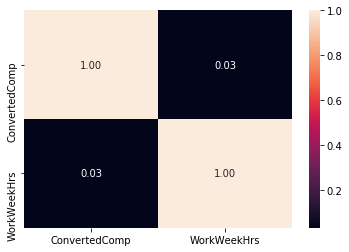

In [8]:
sns.heatmap(df[vars_of_interest].corr(), annot=True, fmt=".2f"); # Check correlations
# We can only see that a higher salary is slightly correlated with longer working hours.

In [9]:
def create_bar_charts(df,survey_question):
    '''
    INPUT - df - pandas dataframe that contains our survey data
            survey_question - the survey question of interest for which we want to examine the value distribution
            should be used for categorical variables
    OUTPUT - 
            Plot of the value distribution of the survey question of interest
    '''

    df[survey_question].value_counts().plot(kind='bar', color = 'darkcyan')
    plt.title("Value Distribution of Survey Question - " + survey_question)


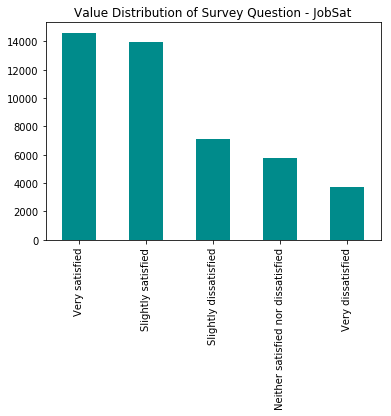

In [10]:
create_bar_charts(df,'JobSat') # Value Distribution of Job Satisfaction

In general, developers seem to be mostly satisfied with their job. Indeed, we can see that the majority of them consider themselves very satisfied.

Regarding the years of coding experience, we have two potential columns that might be relevant. Let's check out the difference between them.

In [11]:
# Please note that this function was adopted from a tutorial from the Udacity Data Scientist Nanodegree
def get_description(schema, column_name):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc

In [12]:
get_description(schema, 'YearsCode')

'Including any education, how many years have you been coding in total?'

In [13]:
get_description(schema, 'YearsCodePro')

'NOT including education, how many years have you coded professionally (as a part of your work)?'

We can see that the first column specifies the number of years of coding experience, while the second one also specifies this value but includes the number of years spent on coding during education.

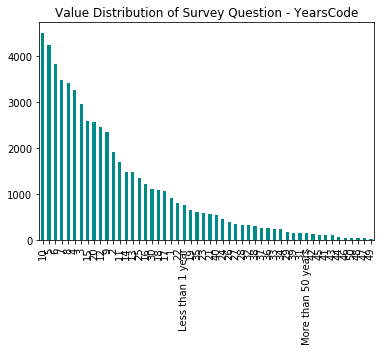

In [14]:
create_bar_charts(df,'YearsCode') # Years of Coding Experience

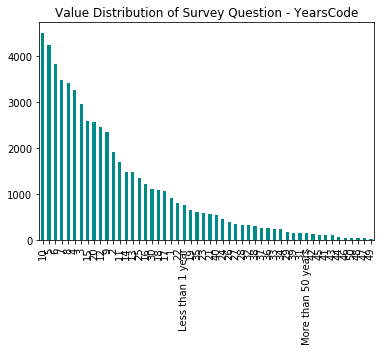

In [15]:
create_bar_charts(df,'YearsCode') # Years of Coding Experience without Education

These bar charts are really hard to read. It might make sense to transform them into numeric values.

In [16]:
def create_histogram(df,survey_question, bin_size, max_value):
    '''
    INPUT - df - pandas dataframe that contains our survey data
            survey_question - the survey question of interest for which we want to examine the value distribution
            bin_size - desired size of each bin in the histogram
            max_value - maximum value to be displayed on the x-axis to make the chart more readable
            should be used for numeric variables
    OUTPUT - 
            Plot of the histogram of the survey question of interest
    '''

    df[survey_question].plot(kind='hist', color = 'darkcyan', bins = range(min(df[survey_question].fillna(-1).astype(int)), max(df[survey_question].fillna(-1).astype(int)) + bin_size, bin_size))
    plt.xlim(-1,max_value)
    plt.title("Value Distribution of Survey Question - " + survey_question)


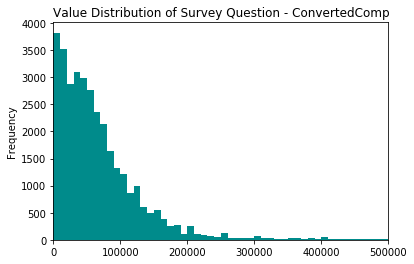

In [17]:
create_histogram(df,'ConvertedComp', bin_size = 10000, max_value = 500000)

In [18]:
len(df[df['ConvertedComp']> 500000]) # Number of discarded outliers in the above histogram

1226

The salary of the developers seems to resemble a right-skewed distribution. The vast majority of them earns up to 100,000 USD. However, we can also see a significant number of people earning more than 100,000 USD. People earning more than 500,000 USD are extremely rare (1,226).

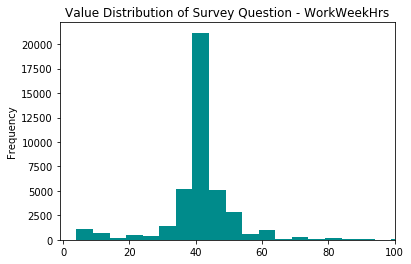

In [19]:
create_histogram(df,'WorkWeekHrs', bin_size = 5, max_value = 100)

In [20]:
len(df[df['WorkWeekHrs']> 100]) # Number of discarded outliers in the above histogram

185

In [21]:
round(df['WorkWeekHrs'].mean(),0) # Mean working hours per week

41.0

The weekly working hours of the developers seems to follow a symmetric distribution around the mean of around 41 working hours per week. The histogram highlights a significant number of people with a small number of working hours (< 15 hours). They could represent part-time developers.

### Initial Observations
The initial analysis revealed that not all respondents answered our questions of interest. More specifically, we can see that the response rate varies from 54% to 89%. As a significant share of respondents did not answer specific questions, we should not simply discard these records. Instead, it might make sense to impute them (e.g., with the mean or mode) or mark them with a special value to identify them as a group. We can then check whether keeping these records provides any value (e.g., because these people that have not answered one question might have answered the remaining questions) or whether we can discard them.

Furthermore, the analysis revealed that our analysis could also benefit from some data transformations, e.g., converting the variable on the years of work experience into a numeric variable.
With these observations in mind, we will now start the process of preparing the data.

## 3 Data Preparation

As discussed in the Data Understanding section, all columns of interest seem to contain a significant number of NAs. Therefore, dropping these records would reduce the size of the data set tremendously. To avoid this, the missing values will instead be imputed with a value that differentiates them from the rest. As for each column a large number of values are missing, this method is chosen instead of imputing them with the mean or mode. Otherwise, it would be hard to differentiate this large group of records from the other records.

As a second step, this section will take care of outliers and transform them. While these transformations then reduce the information value (by assigning lower values to the outliers), they will make the charts in the analysis part more readable. Also, as it has been touched by the previous section, only a small number of outliers will be affected by these transformations.

Thirdly, the data types of some of the columns will be transformed to facilitate their handling.

Lastly, we will create a binary column JobSatBinary that specifies whether someone is satisfied with their job (1) or not (0). We will use this variable as the dependent variable for the machine learning part.

### YearsCode and YearsCodePro

In [22]:
df['YearsCode'].isna().sum() # 6,777 NAs

6777

In [23]:
df['YearsCode'].fillna(-1, inplace = True) # Specify NAs with '-1' as value

To convert the column into a column of type integer, we need to transform the two values 'Less than 1 year' and 'More than 50 years'. To this end, we will transform the former into '0' and the latter into '50' (adding these values to the existing '50'). Only a relatively small number of people is affected by this transformation. However, we need to ensure to be transparent about this transformation.

In [24]:
df['YearsCode'].loc[(df['YearsCode'] == 'Less than 1 year')] = 0
df['YearsCode'].loc[(df['YearsCode'] == 'More than 50 years')] = 50

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
df['YearsCode'].value_counts() # Check results

-1    6777
10    4510
5     4249
6     3834
7     3477
8     3407
4     3254
3     2951
15    2586
20    2562
12    2453
9     2344
2     1916
11    1691
14    1479
13    1468
25    1338
16    1203
30    1114
18    1089
17    1057
1      902
22     792
0      757
19     657
35     599
23     572
21     550
40     535
24     449
26     378
27     335
28     314
32     309
38     289
37     258
36     246
33     236
34     230
29     178
39     155
31     154
50     143
42     127
45     108
41      99
43      92
44      69
46      44
50      42
48      35
47      27
49      21
Name: YearsCode, dtype: int64

In [26]:
df['YearsCode'] = df['YearsCode'].astype(int)

In [27]:
df.info() # Check data type of 'YearsCode'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   34756 non-null float64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                

In [28]:
df['YearsCodePro'].isna().sum() # 18,112 NAs

18112

In [29]:
df['YearsCodePro'].fillna(-1, inplace = True) # Specify NAs with '-1' as value
df['YearsCodePro'].loc[(df['YearsCodePro'] == 'Less than 1 year')] = 0
df['YearsCodePro'].loc[(df['YearsCodePro'] == 'More than 50 years')] = 50
df['YearsCodePro'] = df['YearsCodePro'].astype(int)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
df['YearsCodePro'].value_counts()# Check results

-1     18112
 3      4815
 2      4814
 5      3978
 4      3716
 1      2818
 6      2741
 10     2735
 8      2234
 7      2229
 0      2174
 15     1531
 12     1460
 20     1416
 9      1232
 11      947
 13      904
 14      758
 16      624
 25      583
 18      533
 17      475
 22      444
 19      373
 30      370
 21      341
 23      321
 24      259
 26      180
 35      162
 27      149
 28      128
 32      103
 40      101
 33       93
 31       80
 34       79
 29       72
 38       64
 36       57
 37       53
 50       47
 39       42
 42       26
 45       21
 41       19
 44       16
 43       15
 46        7
 47        5
 48        4
 49        1
Name: YearsCodePro, dtype: int64

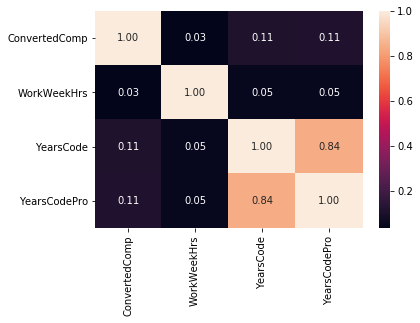

In [31]:
sns.heatmap(df[vars_of_interest].corr(), annot=True, fmt=".2f"); # Check correlation between YearCode and YearCodePro

The heatmap reveals that YearsCode and YearsCodePro are highly correlated (0.84). Due to this and as YearsCodePro contains a much higher share of NAs, the analysis will concentrate on YearsCode only and will ommit the column YearsCodePro.

### WorkWeekHrs

In [32]:
df['WorkWeekHrs'].isna().sum() # 23,310 NAs

23310

In [33]:
df[['WorkWeekHrs']].info() # Float data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 1 columns):
WorkWeekHrs    41151 non-null float64
dtypes: float64(1)
memory usage: 503.7 KB


In [34]:
# Check out minimum and maximum working hours
print('Minimum working hours: ' + str(min(df['WorkWeekHrs'])) + '      |  Maximum working hours: ' + str(max(df['WorkWeekHrs'])))

Minimum working hours: 1.0      |  Maximum working hours: 475.0


In [35]:
len(df[df['WorkWeekHrs']> 100]) # Outliers/unrealistic values --> 185

185

In [36]:
len(df[df['WorkWeekHrs']== 100])

31

We can see that 185 respondents stated that they were (regularly) working more than 100 hours a week. As these numbers seem to high, we will transform these values and assign them 100 as a value. After this transformation we will have 31 + 185 = 216 records with weekly working hours of 100.

Intended transformations:
* Specify NAs as -1
* Specify outliers as 100
* Convert data type from float to int

In [37]:
df['WorkWeekHrs'].fillna(-1, inplace = True) # Specify NAs with '-1' as value
df['WorkWeekHrs'].loc[(df['WorkWeekHrs'] > 100)] = 100
df['WorkWeekHrs'] = df['WorkWeekHrs'].astype(int)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
df['WorkWeekHrs'].value_counts()# Check results

-1      23310
 40     19293
 45      3789
 50      2748
 35      2002
 38      1376
 37      1355
 30      1036
 42      1016
 60      1010
 8        834
 48       603
 44       486
 20       453
 36       429
 55       382
 39       374
 9        366
 32       349
 43       290
 25       239
 10       227
 70       225
 100      216
 41       199
 80       141
 46       106
 7        105
 5         99
 24        98
        ...  
 29         9
 19         9
 1          8
 62         7
 2          7
 57         7
 53         7
 31         6
 64         6
 66         5
 96         4
 17         4
 78         4
 77         4
 67         3
 98         3
 59         3
 95         3
 86         3
 68         3
 61         2
 99         1
 93         1
 79         1
 83         1
 73         1
 81         1
 69         1
 87         1
 88         1
Name: WorkWeekHrs, Length: 92, dtype: int64

In [39]:
df[['WorkWeekHrs']].info() # Float data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 1 columns):
WorkWeekHrs    64461 non-null int64
dtypes: int64(1)
memory usage: 503.7 KB


### ConvertedComp

In [40]:
df['ConvertedComp'].isna().sum() # 29,705 NAs

29705

In [41]:
df[['ConvertedComp']].info() # Float data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 1 columns):
ConvertedComp    34756 non-null float64
dtypes: float64(1)
memory usage: 503.7 KB


In [42]:
# Check out minimum and maximum compensation
df['ConvertedComp'].describe()

count    3.475600e+04
mean     1.037561e+05
std      2.268853e+05
min      0.000000e+00
25%      2.464800e+04
50%      5.404900e+04
75%      9.500000e+04
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [43]:
len(df[df['ConvertedComp']> 500000]) # Outliers

1226

Intended transformations:
* Specify NAs as -1
* Specify outliers as 500000
* Convert data type from float to int

Note that the transformation of these outliers is not due to the assumption of unrealistic values (like for the working hours). Instead, it is used to make the charts more readable.

In [44]:
df['ConvertedComp'].fillna(-1, inplace = True) # Specify NAs with '-1' as value
df['ConvertedComp'].loc[(df['ConvertedComp'] > 500000)] = 500000
df['ConvertedComp'] = df['ConvertedComp'].astype(int)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [45]:
df.info() # Check results

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
Respondent                      64461 non-null int64
MainBranch                      64162 non-null object
Hobbyist                        64416 non-null object
Age                             45446 non-null float64
Age1stCode                      57900 non-null object
CompFreq                        40069 non-null object
CompTotal                       34826 non-null float64
ConvertedComp                   64461 non-null int64
Country                         64072 non-null object
CurrencyDesc                    45472 non-null object
CurrencySymbol                  45472 non-null object
DatabaseDesireNextYear          44070 non-null object
DatabaseWorkedWith              49537 non-null object
DevType                         49370 non-null object
EdLevel                         57431 non-null object
Employment                      63854 non-null object
Ethnicity                  

In [46]:
df['ConvertedComp'].describe() # Check results

count     64461.000000
mean      44038.762104
std       84584.561970
min          -1.000000
25%          -1.000000
50%        6897.000000
75%       58368.000000
max      500000.000000
Name: ConvertedComp, dtype: float64

### JobSat

In [47]:
df['JobSat'].isna().sum() # 19,267 NAs

19267

Intended transformations:
* Specify NAs as 'Unknown'
* Create an additional column JobSatBinary that specifies whether an individual is satisfied or not. This variable can be used for the machine learning part.

In [48]:
df['JobSat'].fillna('Unknown', inplace = True) # Specify NAs with 'Unknown' as value

In [49]:
df['JobSat'].value_counts()

Unknown                               19267
Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

In [50]:
def create_binary_job_sat_column(row):
    '''
    INPUT - row in data frame df that will be checked and then transformed into a value for a new column JobSatBinary
    OUTPUT - value 1 or 0 that will be used for the new column JobSatBinary that indicates whether somebody is satisfied (1) or not (0)
    '''
    if row['JobSat'] == 'Very satisfied':
        value = 1
    elif row['JobSat'] == 'Slightly satisfied':
        value = 1
    else:
        value = 0
    return value

In [51]:
df['JobSatBinary'] = df.apply(create_binary_job_sat_column, axis=1) # Apply function to create binary JobSatBinary column

In [52]:
df['JobSatBinary'].value_counts() # Check results

0    35920
1    28541
Name: JobSatBinary, dtype: int64

Please note that this transformation was somewhat inprecise as we assigned the records who did not answer the question regarding job satisfaction a 0, indicating that they were not satisfied. We will later check in detail whether this assignment makes sense or whether we should ommit the records with JobSat = 'Unknown' to prevent distorting the results.

### Summary
As described in the code, the following transformations have been done:
* Marking NAs with '-1' or 'Unknown' to prevent discarding them or simply imputing them with the mode or mean. This approach was chosen as each column contains a large number of NAs.
* Handling outliers by transforming them into smaller values.
* Changing some data types.
* Creating a new binary column to indicate the job satisfaction.

## 4 Data Analysis and Modeling

The first three parts of this section are occupied with examining the variables of interest as part of a univariate analysis. 4.4 will then check whether we could use these variables to predict the job satisfaction. This could complement the results from the first three sections to determine to which extent a relation between the salary, the working hours, the work experience and the job satisfaction might exist.

In [53]:
plt.rcParams['figure.figsize'] = [10, 6] # Adapt default plot size

### 4.1 Are Developers with a Higher Salary More Satisfied?

In [54]:
len(df.query('JobSat == "Unknown" and ConvertedComp >= 0')) # Number of respondents who did not answer the questions on their job satisfaction
# but answered the question on their compensation

55

Given this small number of answers (55), we can discard the respondents whose job satisfaction is unknown. This of course contradicts our previous motivation of (initially) keeping the records for whom the job satisfaction is unknown.

In [55]:
df_comp = df.copy()
df_comp = df_comp[df_comp['JobSat'] != 'Unknown'] # Remove records for which the job satisfaction is unknown

In [56]:
df_comp['JobSat'].value_counts() # check value counts

Very satisfied                        14611
Slightly satisfied                    13930
Slightly dissatisfied                  7124
Neither satisfied nor dissatisfied     5783
Very dissatisfied                      3746
Name: JobSat, dtype: int64

In [57]:
medians = df_comp.groupby(['JobSat'])['ConvertedComp'].median() # Calculate median values for annotation of boxplot
medians

JobSat
Neither satisfied nor dissatisfied    16754
Slightly dissatisfied                 33150
Slightly satisfied                    35672
Very dissatisfied                     28465
Very satisfied                        48600
Name: ConvertedComp, dtype: int64

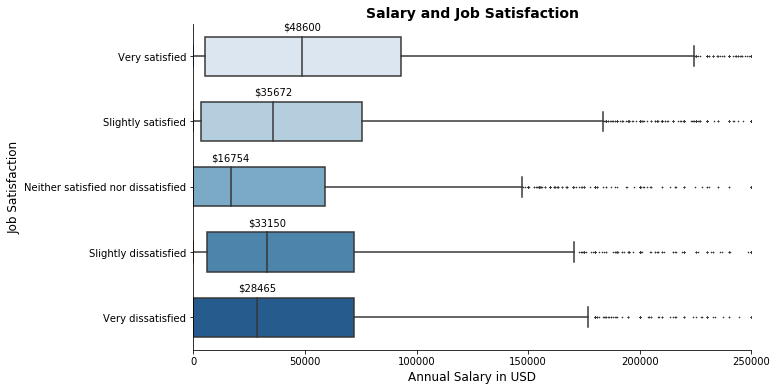

In [58]:
# Create seaborn boxplot
box_plot = sns.boxplot(x="ConvertedComp", y="JobSat", data=df_comp, # define data, x- and y-axis
                       width = 0.6, # size of each boxplot
                       order = ['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied', 'Slightly dissatisfied',
                       'Very dissatisfied'], # order of boxplots
                       palette = 'Blues', # colour schema
                       saturation = 0.7, flierprops = dict(marker='x', markersize=1)) # specify formatting of boxes and outliers
# Annotate medians
box_plot.annotate("$" + str(medians[4]), xy= (medians[4], -0.4), horizontalalignment='center',  color='black')
box_plot.annotate("$" + str(medians[2]), xy= (medians[2], 0.6), horizontalalignment='center',  color='black')
box_plot.annotate("$" + str(medians[0]), xy= (medians[0], 1.6), horizontalalignment='center',  color='black')
box_plot.annotate("$" + str(medians[1]), xy= (medians[1], 2.6), horizontalalignment='center',  color='black')
box_plot.annotate("$" + str(medians[3]), xy= (medians[3], 3.6), horizontalalignment='center',  color='black')
# Reduce x-axis length to make the chart more readable
plt.xlim(0, 250000)
# Format and annotate labels
plt.xlabel('Annual Salary in USD', size = 12)
plt.ylabel('Job Satisfaction', size = 12)
plt.title('Salary and Job Satisfaction', size = 14,fontweight='bold')
# Remove axis
sns.despine()

In general, we can see that a higher salary is correlated with a higher job satisfaction. Interestingly, those respondents who said that they were neither satisfied nor dissatisfied have the lowest salary.

In [59]:
len(df_comp[df_comp['ConvertedComp']> 250000]) # Outliers that are not displayed

1812

Please note that the chart above has ommitted 1,812 outliers that have a annual salary of more than 250,000 USD. As the cut-off of 250,000 USD is below the 500,000 USD that we specified as the value for the outliers, the transformation in section 3 was not relevant for this chart. 

### 4.2 Are Longer Working Hours Correlated with a Higher Job Satisfaction?

In [60]:
len(df.query('JobSat == "Unknown" and WorkWeekHrs >= 0')) # Number of respondents who did not answer the questions on their job satisfaction
# but answered the question on their weekly working hours

94

Given this small number of answers (55), we can discard the respondents whose job satisfaction is unknown. This of course contradicts our previous motivation of (initially) keeping the records for whom the job satisfaction is unknown.

In [61]:
df_work_hours = df.copy()
df_work_hours = df_comp[df_comp['JobSat'] != 'Unknown'] # Remove unknown records

In [62]:
medians = df_work_hours.groupby(['JobSat'])['WorkWeekHrs'].median() # Calculate median values for annotation of boxplot
medians

JobSat
Neither satisfied nor dissatisfied    40
Slightly dissatisfied                 40
Slightly satisfied                    40
Very dissatisfied                     40
Very satisfied                        40
Name: WorkWeekHrs, dtype: int64

We can observe that the median working hours are equal across all categories of job satisfaction.

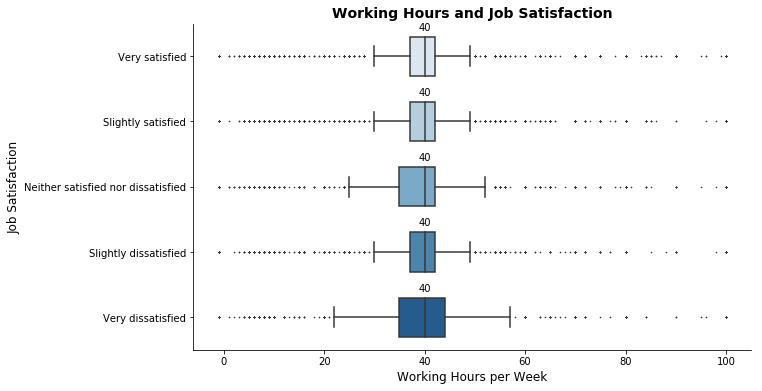

In [63]:
# Create seaborn boxplot
box_plot = sns.boxplot(x="WorkWeekHrs", y="JobSat",
            data=df_work_hours, width = 0.6,
           order = ['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied', 'Slightly dissatisfied',
           'Very dissatisfied'], palette = 'Blues', saturation = 0.7, flierprops = dict(marker='x', markersize=1))
# Annotate medians
box_plot.annotate(str(medians[4]), xy= (medians[4], -0.4), horizontalalignment='center',  color='black')
box_plot.annotate(str(medians[2]), xy= (medians[2], 0.6), horizontalalignment='center',  color='black')
box_plot.annotate(str(medians[0]), xy= (medians[0], 1.6), horizontalalignment='center',  color='black')
box_plot.annotate(str(medians[1]), xy= (medians[1], 2.6), horizontalalignment='center',  color='black')
box_plot.annotate(str(medians[3]), xy= (medians[3], 3.6), horizontalalignment='center',  color='black')
# Format and annotate labels
plt.xlabel('Working Hours per Week', size = 12)
plt.ylabel('Job Satisfaction', size = 12)
plt.title('Working Hours and Job Satisfaction', size = 14,fontweight='bold')
# Remove axis
sns.despine()

In general, we cannot observe an obvious correlation between the working hours and job satisfaction. The median hours worked per week are 40, which is the same value across all categories of job satisfaction. However, we can observe that the spread for developers who are very dissatisfied or answered that they were neither satisfied nor dissatisfied is larger than for the other categories. We can also observe that the boundary for the second quartile (the lower bound of the box) is lower for these two categories. On the other hand, the boundary for the third quartile of those that answered that they were very dissatisfied is slightly higher than for the other categories. This might indicate that some of the very dissatisfied developers could either work not enough or too much (at least in comparison to their preferences).

In [64]:
df_work_hours.groupby('JobSat')['WorkWeekHrs'].describe().round() # Check descriptive statistics

,count,mean,std,min,25%,50%,75%,max
JobSat,,,,,,,,
Neither satisfied nor dissatisfied,5783.0,35.0,18.0,-1.0,35.0,40.0,42.0,100.0
Slightly dissatisfied,7124.0,37.0,15.0,-1.0,37.0,40.0,42.0,100.0
Slightly satisfied,13930.0,36.0,15.0,-1.0,37.0,40.0,42.0,100.0
Very dissatisfied,3746.0,36.0,18.0,-1.0,35.0,40.0,44.0,100.0
Very satisfied,14611.0,37.0,15.0,-1.0,37.0,40.0,42.0,100.0


### 4.3 Do experienced programmers tend to be more satisfied than their less experienced colleagues?

In [65]:
len(df.query('JobSat == "Unknown" and YearsCode >= 0')) # Number of respondents who did not answer the questions on their job satisfaction
# but answered the question on their coding experience

12823

As many people who did not respond on their job satisfaction specified their work experience, it makes sense to keep them as we could determine whether this group of people differs from the others in terms of their work experience.

In [66]:
medians = df.groupby(['JobSat'])['YearsCode'].median() # Calculate median values for annotation of boxplot
medians

JobSat
Neither satisfied nor dissatisfied    10
Slightly dissatisfied                 11
Slightly satisfied                    11
Unknown                                3
Very dissatisfied                     12
Very satisfied                        12
Name: YearsCode, dtype: int64

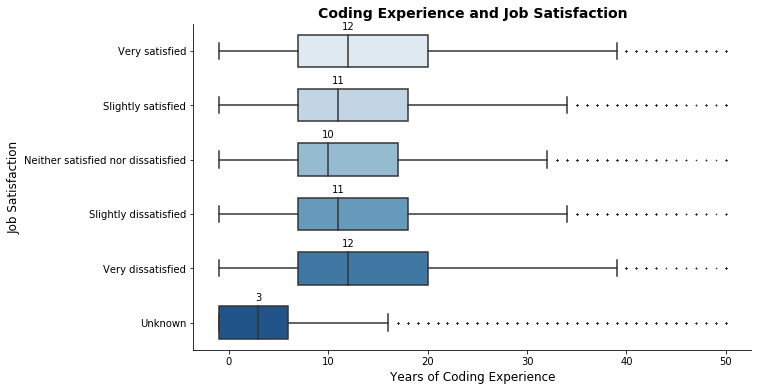

In [67]:
# Create seaborn boxplot
box_plot = sns.boxplot(x="YearsCode", y="JobSat",
            data=df, width = 0.6,
           order = ['Very satisfied', 'Slightly satisfied', 'Neither satisfied nor dissatisfied', 'Slightly dissatisfied',
           'Very dissatisfied', 'Unknown'], palette = 'Blues', saturation = 0.7, flierprops = dict(marker='x', markersize=1))
# Annotate medians
box_plot.annotate(str(medians[5]), xy= (medians[5], -0.4), horizontalalignment='center',  color='black')
box_plot.annotate(str(medians[2]), xy= (medians[2], 0.6), horizontalalignment='center',  color='black')
box_plot.annotate(str(medians[0]), xy= (medians[0], 1.6), horizontalalignment='center',  color='black')
box_plot.annotate(str(medians[1]), xy= (medians[1], 2.6), horizontalalignment='center',  color='black')
box_plot.annotate(str(medians[4]), xy= (medians[4], 3.6), horizontalalignment='center',  color='black')
box_plot.annotate(str(medians[3]), xy= (medians[3], 4.6), horizontalalignment='center',  color='black')
# Format and annotate labels
plt.xlabel('Years of Coding Experience', size = 12)
plt.ylabel('Job Satisfaction', size = 12)
plt.title('Coding Experience and Job Satisfaction', size = 14,fontweight='bold')
# Remove axis
sns.despine()

There is no clear relationship between coding experience and job satisfaction. The medians vary between 10 and 12 for the categories. Only 'Unknown' stands out. Respondents who did not answer their job satisfaction only have 3 years of median coding experience and, therefore, differ significantly from the remaining respondents. However, we should be careful when interpreting this result as we don't know whether they have responded this question truthfully or not. Apart from this, the chart suggests that only a relatively small number of respondents have only a few years of coding experience. Instead, the vast majority of the survey respondents tend to be long-term developers. This might suggest a selection bias of the survey, with mainly experienced developers having taken the survey. 

### 4.4 Can We Predict Job Satisfaction based on the Salary, Working Hours, and Working Experience?

We will try out a logistic regression model (4.4.1), a decision tree (4.4.2) and a random forest (4.4.3). Please note that we restrict these models only to the three variables of interest and disregard other variables. Due to this, we don't expect an excellent performance of the models. Also, we could not derive any causation from potential correlations that we might detect as we of course have many ommitted variables that could cause an ommitted variable bias. The analysis also does not engage in any hyperparameter tuning to improve the results.

The idea of this section is to complement the previous analysis and determine whether these variables indeed have a strong relation to job satisfaction or not (which has been so far suggested by the analysis).

In [68]:
# Import relevant functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [69]:
df_binary = df[df['JobSat'] != 'Unknown'] # Remove entries with JobSat = 'Unknown'; we only want to check out satisfied or unsatisfied respondents

As discussed in Section 3, we simply assigned records with an unknown job satisfaction to the value 0 (not satisfied) of the binary column JobSatBinary. As this is of course inaccurate and as the previous section revealed, that the other columns (except for the coding experience) are not filled, it makes much more sense to discard those records.

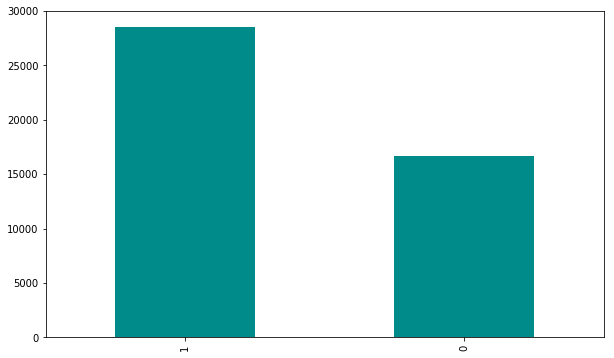

In [70]:
df_binary['JobSatBinary'].value_counts().plot(kind='bar', color = 'darkcyan') # Plot distribution of target variable

#### 4.4.1 Logistic Regression

In [71]:
X = df_binary[['ConvertedComp', 'WorkWeekHrs', 'YearsCode']] # Create data frame for explanatory variables
X.head()

,ConvertedComp,WorkWeekHrs,YearsCode
0,-1,50,36
1,-1,-1,7
3,-1,40,7
5,-1,-1,6
6,-1,-1,6


In [72]:
y = df_binary[['JobSatBinary']] # Create data frame for dependent variable
y.head()

,JobSatBinary
0,1
1,0
3,0
5,1
6,1


In [73]:
print(X.info()) # Check number of values
print(y.info()) # Check number of values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 0 to 64154
Data columns (total 3 columns):
ConvertedComp    45194 non-null int64
WorkWeekHrs      45194 non-null int64
YearsCode        45194 non-null int64
dtypes: int64(3)
memory usage: 1.4 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 0 to 64154
Data columns (total 1 columns):
JobSatBinary    45194 non-null int64
dtypes: int64(1)
memory usage: 706.2 KB
None


In [74]:
scaler = StandardScaler() # Initialize scaler
X_trans = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index) # Normalize variables for better predictions
X_trans.head() # Check results

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,ConvertedComp,WorkWeekHrs,YearsCode
0,-0.660538,0.854266,2.295052
1,-0.660538,-2.357400,-0.728422
3,-0.660538,0.224527,-0.728422
5,-0.660538,-2.357400,-0.832680
6,-0.660538,-2.357400,-0.832680


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=123) # Split data set

In [76]:
lr_model = LogisticRegression() # Instantiate
lr_model.fit(X_train, y_train) #Fit


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
#Predict using your model
y_test_preds = lr_model.predict(X_test)
y_train_preds = lr_model.predict(X_train)

#Score using your model
test_score = accuracy_score(y_test, y_test_preds)
train_score = accuracy_score(y_train, y_train_preds)


In [78]:
# Accuracy for train and test set
print(train_score)
print(test_score)

0.631226662979
0.632702732603


In [79]:
confusion_matrix(y_test, y_test_preds) # Confusion matrix

array([[   0, 3320],
       [   0, 5719]])

We can see that the logistic regression model actually classifies all respondents as satisfied. This results in an accuracy of around 63% both for the training and test set. These results indicate that the model actually is not able to make any (valuable) predictions.

#### 4.4.2 Decision Tree

In [80]:
clf = tree.DecisionTreeClassifier() # Instantiate
clf.fit(X_train, y_train) # Fit

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
#Predict using your model
y_test_preds = clf.predict(X_test)
y_train_preds = clf.predict(X_train)

In [82]:
cm = confusion_matrix(y_test, y_test_preds) # Create Confusion Matrix

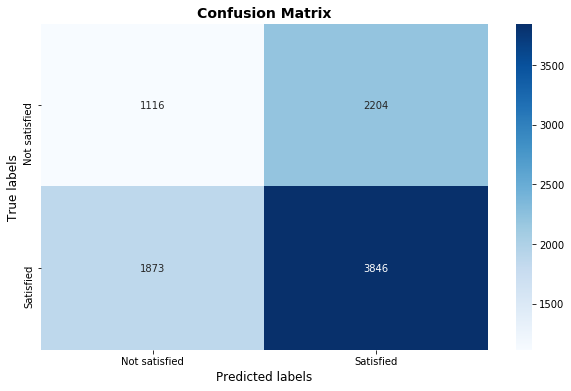

In [83]:
# Plot confusion matrix
ax = sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues');
# labels, title and ticks
ax.set_xlabel('Predicted labels', size = 12);
ax.set_ylabel('True labels', size = 12); 
ax.set_title('Confusion Matrix', size = 14,fontweight='bold'); 
ax.xaxis.set_ticklabels(['Not satisfied', 'Satisfied']); 
ax.yaxis.set_ticklabels(['Not satisfied', 'Satisfied']);

In [84]:
# Check train and test scores
test_score = accuracy_score(y_test, y_test_preds)
train_score = accuracy_score(y_train, y_train_preds)
print(train_score)
print(test_score)

0.874761443784
0.548954530368


In contrast to the logistic regression model, the decision tree is clearly overfitting as the accuracy on the train set by far exceeds the accuracy on the test set.

[Text(0,0,'Annual Salary'),
 Text(0,0,'Weekly Working Hours'),
 Text(0,0,'Years of Coding Experience')]

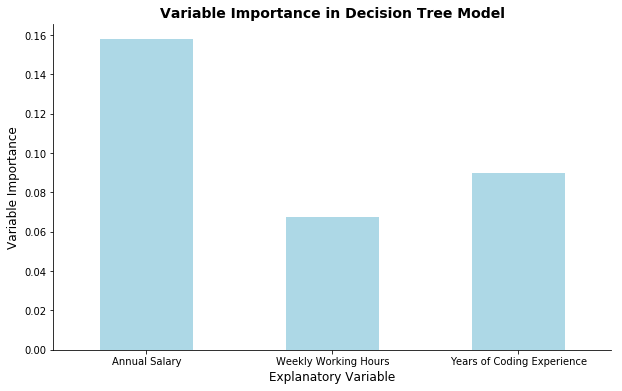

In [85]:
# Check out the importance of each variable for the model to predict JobSatBinary
importance = clf.tree_.compute_feature_importances(normalize=False)
# summarize feature importance
plot_importance = pd.DataFrame(importance.T, columns=['Variable Importance'], index=X.columns).plot(kind = 'bar', color = 'lightblue')
# Format and annotate labels
plt.xlabel('Explanatory Variable', size = 12)
plt.ylabel('Variable Importance', size = 12)
plt.title('Variable Importance in Decision Tree Model', size = 14,fontweight='bold')
# Remove axis
sns.despine()
# Remove legend
plot_importance.get_legend().remove()
plot_importance.set_xticklabels(['Annual Salary', 'Weekly Working Hours', 'Years of Coding Experience'], rotation=360)

As indicated by the univariate analysis, the annual salary seems to have the strongest correlation with job satisfaction. 
However, we need to take into account that the model is clearly overfitting. Hence, this values might not correctly represent the correlation for all respondents.

#### 4.4.3 Random Forest

In [86]:
forest = RandomForestClassifier(n_estimators=100) # instantiate and define number of trees
forest = forest.fit(X, y) # fit

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [87]:
#Predict using your model
y_test_preds = forest.predict(X_test) # predict
y_train_preds = forest.predict(X_train) # predict

In [88]:
cm = confusion_matrix(y_test, y_test_preds) # Create Confusion Matrix

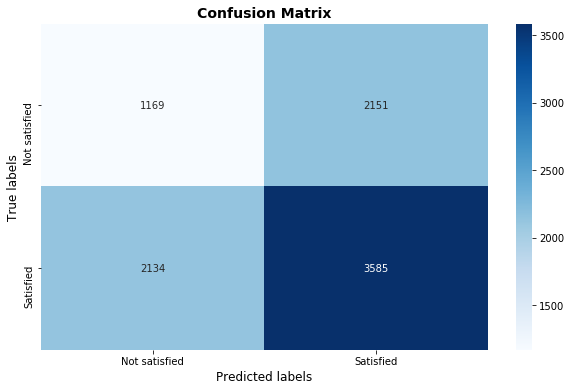

In [89]:
# Plot confusion matrix
ax = sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues');
# labels, title and ticks
ax.set_xlabel('Predicted labels', size = 12);
ax.set_ylabel('True labels', size = 12); 
ax.set_title('Confusion Matrix', size = 14,fontweight='bold'); 
ax.xaxis.set_ticklabels(['Not satisfied', 'Satisfied']); 
ax.yaxis.set_ticklabels(['Not satisfied', 'Satisfied']);

In [90]:
# Check train and test scores
test_score = accuracy_score(y_test, y_test_preds)
train_score = accuracy_score(y_train, y_train_preds)
print(train_score)
print(test_score)

0.533674457198
0.525943135303


This model also does not work as the accuracy is again extremely low both for the train and the test set.

In summary, the three models suggest that the three selected predictors are definitely not sufficient to make good predictions regarding the job satisfaction. Instead, they complement the previous analysis and imply that except for a higher salary, satisfied developers don't share any other visible traits (which the analysis examined) that might differentiate them from their less satisfied developers.

## 5 Evaluation and Conclusion

This analysis explored some of the characteristics that satisfied developers might share. Through this exploration, the analysis set out to determine whether developers (or people who want to become developers) could influence any of these factors that might impact job satisfaction.

The analysis revealed that developers who are satisfied or very satisfied tend to have a higher salary than their colleagues who are (very) unsatisfied. Interestingly, respondents who where somewhat indifferent regarding their job satisfaction tend to have the lowest salary (also compared to the (very) unsatisfied respondents).

On the other hand, there was no obvious relation between job satisfaction and the working hours. Independent of their job satisfaction, the median weekly working hours for developers corresponds to 40. The analysis only revealed that the spread for developers who are very dissatisfied or answered that they were neither satisfied nor dissatisfied is larger than for the other categories.

Similar to the weekly working hours, the analysis did not suggest a clear relationship between coding experience and job satisfaction. The median coding experience varied between 10 and 12 years for the categories. Only respondents who had not stated their job satisfaction stood out. They tend to have only 3 years of median coding experience. However, the analysis revealed a potential selection bias of the survey as the vast majority of the respondents tended to represent long-term developers.

To complement the univariate analysis, a multivariate analysis was conducted to explore whether the three explanatory variables would be sufficient to create a model that could predict job satisfaction. All three created models suggest that this is not the case. Instead, the results indicate that many (ommitted) variables influence job satisfaction, apart from the three included ones.

In summary, the results indicate that satisfied (and dissatisfied) developers can be both experts with years of experience as well as novices in their field and work either long hours or rather short hours. Only a higher salary tends to be associated with a higher job satisfaction. However, regarding this correlation, one needs to be carefuel in terms of interpreting it as we cannot derive causation, that is getting a higher salary resulting in a higher job satisfaction. Instead, we could also assume that developers who are satisfied tend to be more productive and, therefore, receive a higher salary. This means that the three variables don't reveal any obvious path to becoming a satisfied developer. 